<a href="https://colab.research.google.com/github/abrahamfullstack/EDA-Projects/blob/main/Employee_Attrition_and_Performance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Employee Attrition and Performance - EDA**

IBM created a synthetic dataset that you can use to understand how various factors affect employee attrition and satisfaction. Some of the variables include education, job involvement, performance rating, and work-life balance.

Explore this dataset and see if there are any significant variables that indeed affect employee attrition. Take it a step further and see if you can rank the variables from most important to the least.

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

In [55]:
# import data
# data source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

df =pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [56]:
# Review if NA and review columns datatype
df.info()

# Y (output data) is colum Attition

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Prepare the data set and features**

In [67]:
# separate categorical and numerical data (except Attrition)

categorilcal = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

numerical = ['Age',
            'DailyRate',
            'DistanceFromHome',
            'Education',
            'EmployeeCount',
            'EmployeeNumber',
            'EnvironmentSatisfaction',
            'HourlyRate',
            'JobInvolvement',
            'JobLevel',
            'JobSatisfaction',
            'MonthlyIncome',
            'MonthlyRate',
            'NumCompaniesWorked',
            'PercentSalaryHike',
            'PerformanceRating',
            'RelationshipSatisfaction',
            'StandardHours',
            'StockOptionLevel',
            'TotalWorkingYears',
            'TrainingTimesLastYear',
            'WorkLifeBalance',
            'YearsAtCompany',
            'YearsInCurrentRole',
            'YearsSinceLastPromotion',
            'YearsWithCurrManager']

**Check Correlation Bettween Attrition and Numerical Features**

In [91]:
alpha = 0.05
resultAnova = []

for num in numerical:
  CategoryGroupList = df.groupby('Attrition')[num].apply(list)

  F, pv = f_oneway(*CategoryGroupList)

  # Check hypotesis using the P-value
  if pv < alpha:
    resultAnova.append([num, 'Dependent', pv])
  else:
    resultAnova.append([num, 'Independent', pv])

resultAnova = pd.DataFrame(resultAnova, columns=['Feature', 'Dependency', 'P-value'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3349: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


**Sort Values by P-value. The min value is the closest relationship with attrition**

In [95]:
resultAnova = resultAnova.sort_values(by='P-value', ascending=True)
resultAnova

,Feature,Dependency,P-value
19,TotalWorkingYears,Dependent,4.061878e-11
9,JobLevel,Dependent,6.795385e-11
23,YearsInCurrentRole,Dependent,6.003186e-10
11,MonthlyIncome,Dependent,7.147364e-10
0,Age,Dependent,8.356308e-10
25,YearsWithCurrManager,Dependent,1.736987e-09
18,StockOptionLevel,Dependent,1.301015e-07
22,YearsAtCompany,Dependent,2.318872e-07
8,JobInvolvement,Dependent,5.677065e-07
10,JobSatisfaction,Dependent,7.043067e-05


**Plot dependent features from the most related to the least**

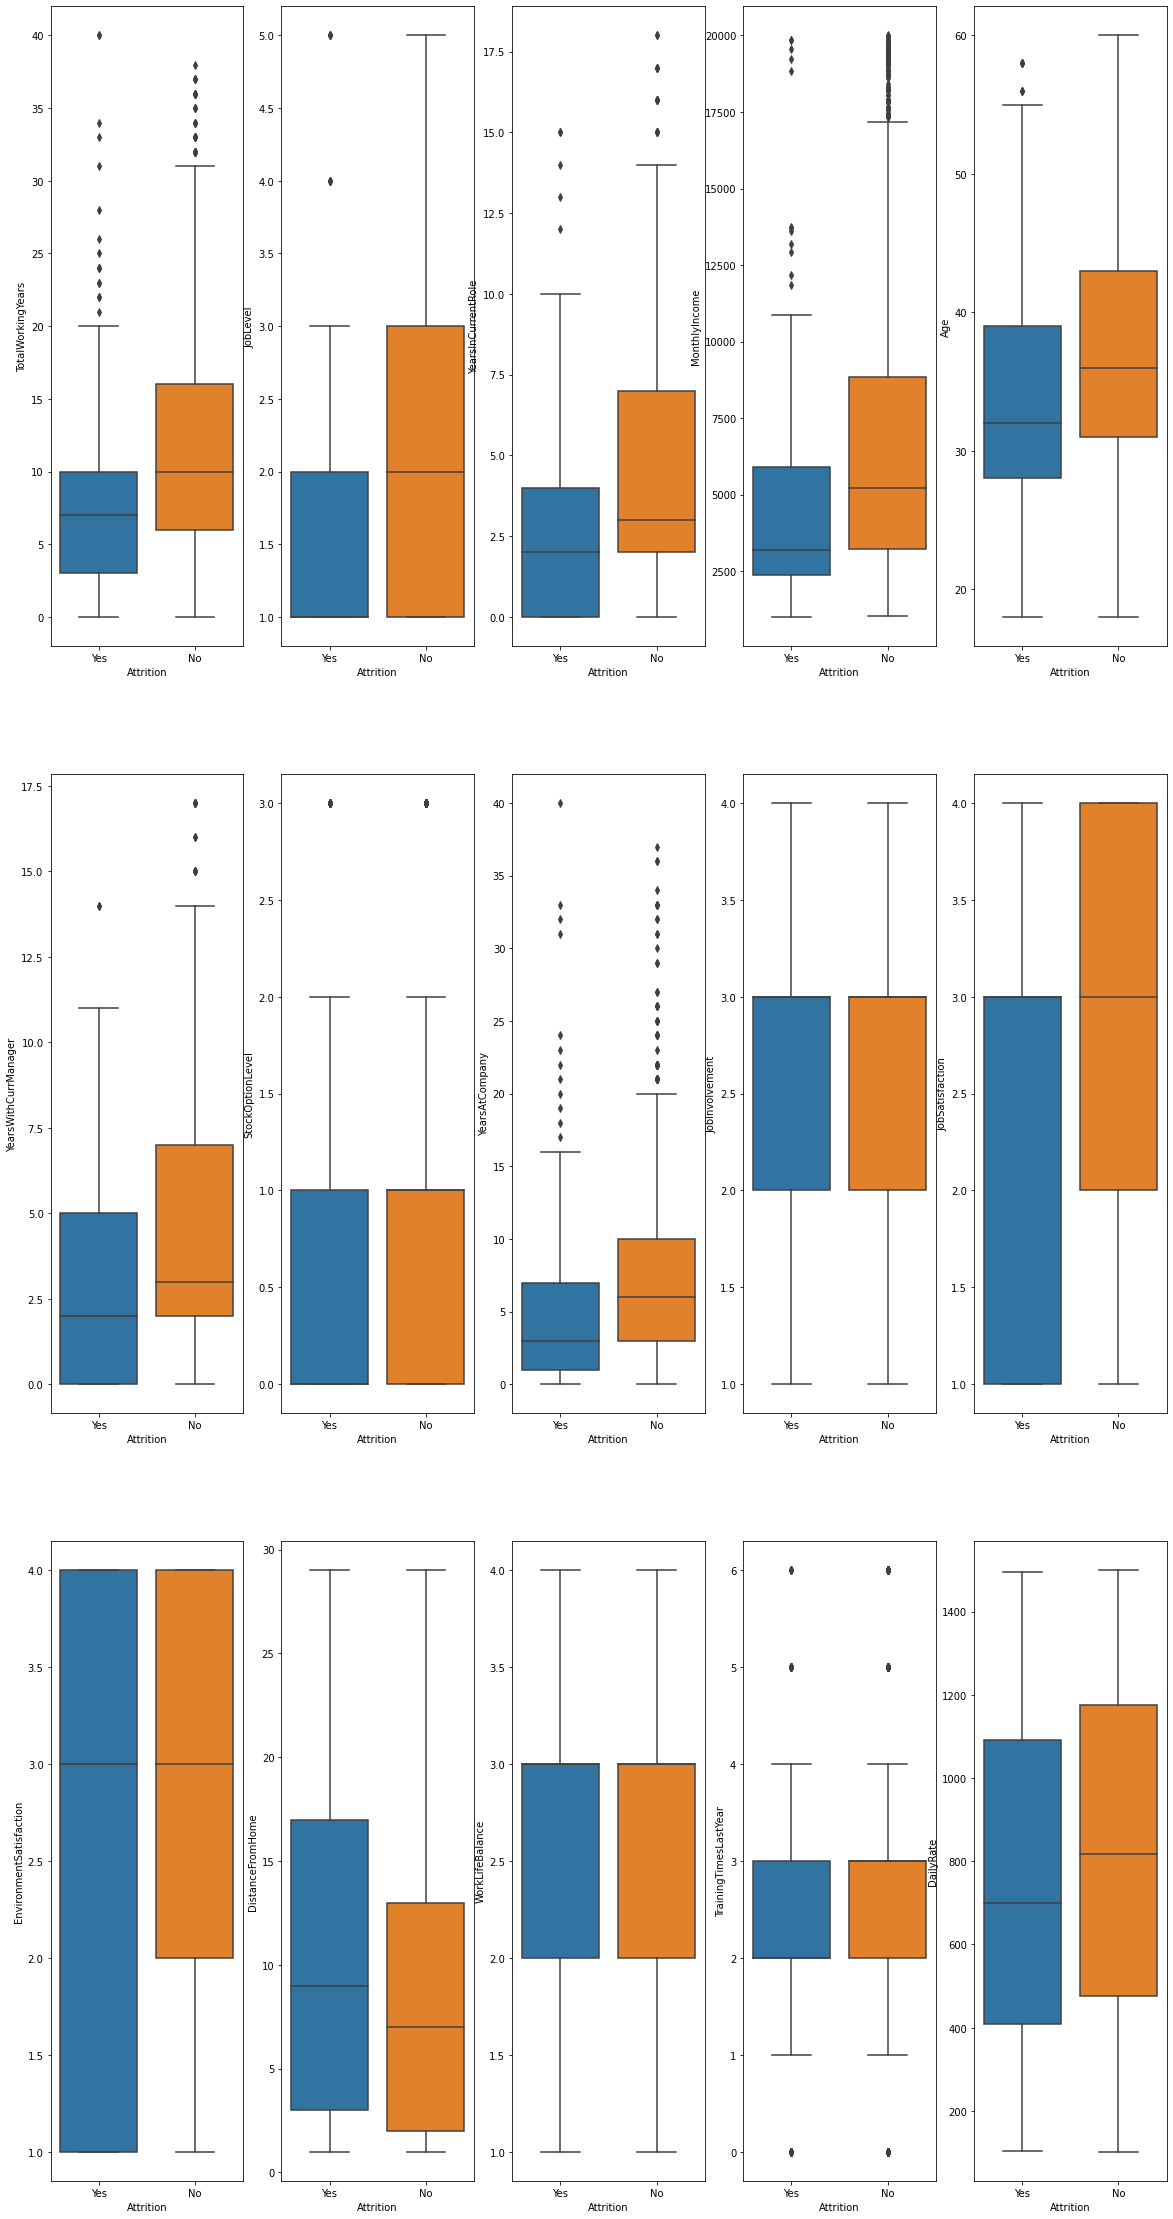

In [96]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 40))

for variable, subplot in zip(resultAnova.Feature[resultAnova['Dependency'] == 'Dependent'], axes.flatten()):
  sns.boxplot(x='Attrition', y=variable, data=df, ax=subplot)

The selected colums have either positive or negative effect on the Attrition from the employee.

An example is, the more DistanceFromHome the more Attrition, or the more JobLevel the less Attrition.

Let's now explore the categorical variables only

**Here we ue the Chi-Square Test to find the dependent and independent features**

In [98]:
# To make select the best features, we use Chi-square test. 
# Null Hypothesis (H0): Two variables are independent
# Alternate Hypothesis (H1): Two variables are not independent

# First we create the contingency table
result = []

for variable in categorilcal:
  table = df[[variable, 'Attrition']]
  table = pd.crosstab(table[variable], table['Attrition'])

  stat, p, dof, expected = chi2_contingency(table)

  # Interpret test-statistic
  prob = 0.95

  # get the critical chi-square
  critical = chi2.ppf(prob, dof)

  if abs(stat) >= critical:
    result.append([variable, 'Dependent', stat, p, critical])
  else:
    result.append([variable, 'Independent', stat, p, critical])

  # interpret p-value
  # alpha = 1.0 - prob
  # print('significance=%3.f, p=%.3f' % (alpha, p))

  # if p <= alpha:
  #   print('Dependent (reject H0)')
  # else:
  #   print('Independent (fail to reject H0)')

result = pd.DataFrame(result, columns=['Feature', 'Dependency', 'Chi-Square', 'P-Value', 'Critical'])

**Sort Values by P-value. The min value is the closest relationship with attrition**

In [101]:
result = result.sort_values(by='P-Value', ascending=True)
result

,Feature,Dependency,Chi-Square,P-Value,Critical
7,OverTime,Dependent,87.564294,8.158424e-21,3.841459
4,JobRole,Dependent,86.190254,2.752482e-15,15.507313
5,MaritalStatus,Dependent,46.163677,9.455511e-11,5.991465
0,BusinessTravel,Dependent,24.182414,5.608614e-06,5.991465
1,Department,Dependent,10.796007,4.525607e-03,5.991465
2,EducationField,Dependent,16.024674,6.773980e-03,11.070498
3,Gender,Independent,1.116967,2.905724e-01,3.841459
6,Over18,Independent,0.000000,1.000000e+00,NaN


**Plot dependent features from the most related to the least**

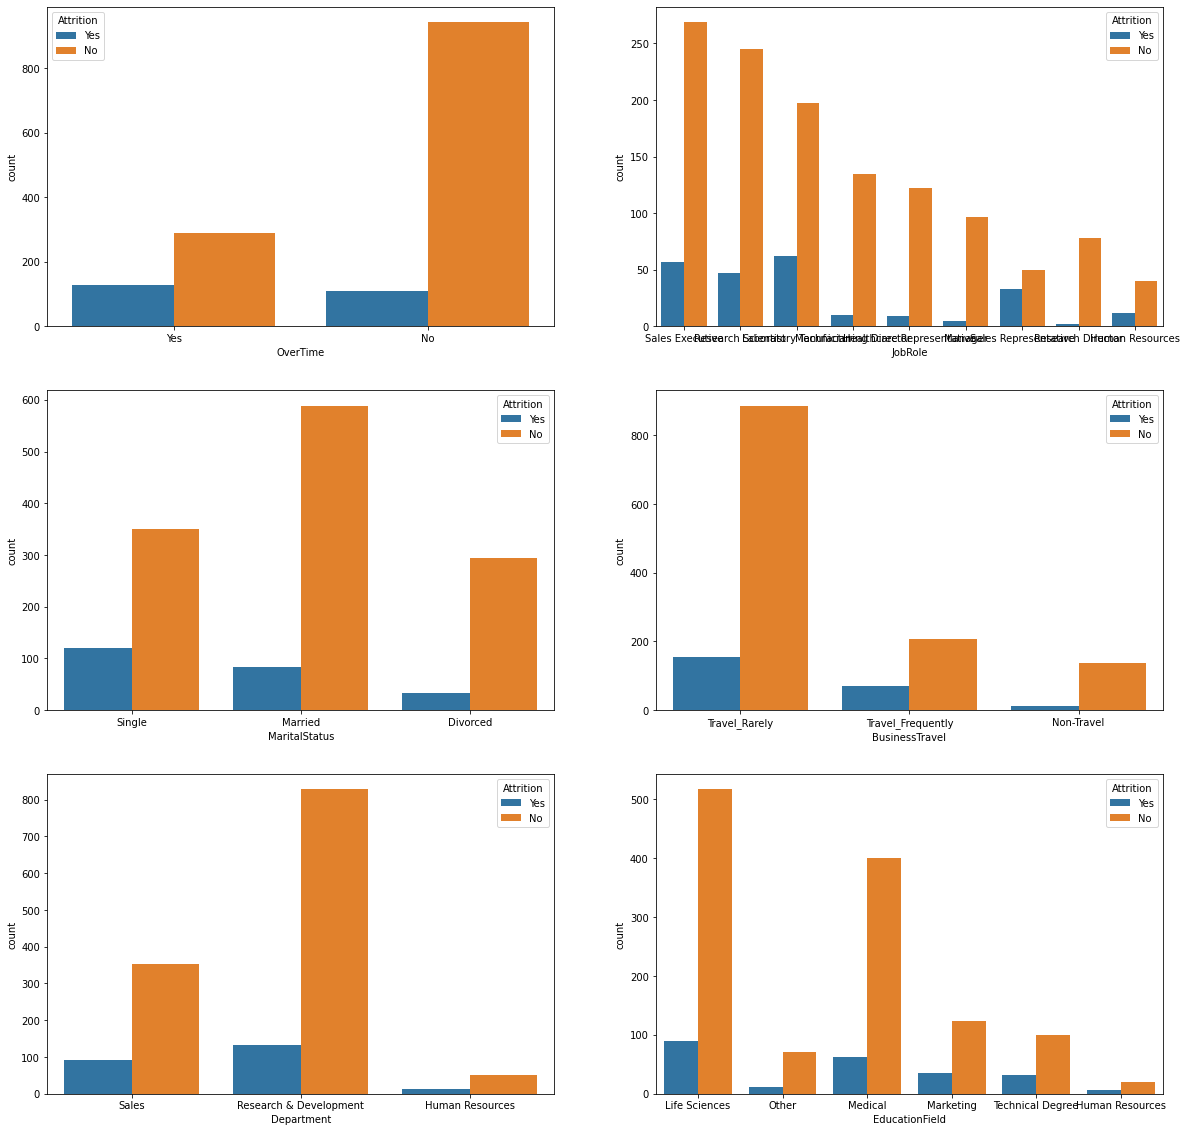

In [108]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for variable, subplot in zip(result.Feature[result['Dependency'] == 'Dependent'], axes.flatten()):
  sns.countplot(x=variable, hue='Attrition',data=df, ax=subplot)

# **Additional Questions**

**Show me a breakdown of distance from home by job role and attrition**

In [120]:
# Represented in a pivot/group table
q1 = df.groupby(['Attrition', 'JobRole'])['DistanceFromHome'].agg([len])
q1

len
Attrition JobRole                       
No        Healthcare Representative  122
          Human Resources             40
          Laboratory Technician      197
          Manager                     97
          Manufacturing Director     135
          Research Director           78
          Research Scientist         245
          Sales Executive            269
          Sales Representative        50
Yes       Healthcare Representative    9
          Human Resources             12
          Laboratory Technician       62
          Manager                      5
          Manufacturing Director      10
          Research Director            2
          Research Scientist          47
          Sales Executive             57
          Sales Representative        33

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


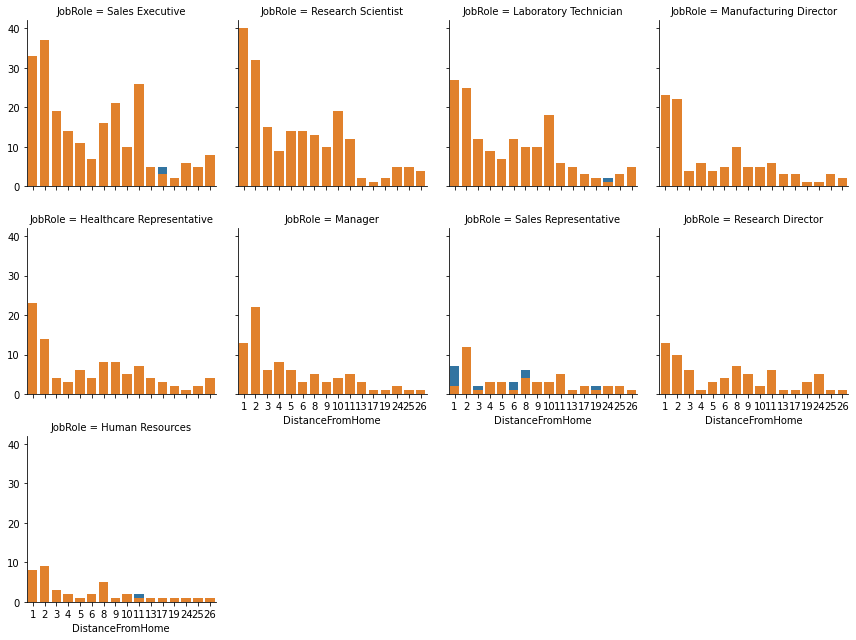

In [131]:
# represented in a graph
# sns.countplot(x='DistanceFromHome', hue=['Attrition', 'JobRole'], data=df)

count_plot = sns.FacetGrid(data=df, col='JobRole', hue='Attrition',col_wrap=4)
count_plot.map(sns.countplot, 'DistanceFromHome')

**Compare average monthly income by education and attrition**

In [136]:
# Represented in a pivot/group table
q2 = df.groupby(['Attrition', 'EducationField'])['MonthlyIncome'].mean()
q2

Attrition  EducationField  
No         Human Resources     8579.950000
           Life Sciences       6775.437137
           Marketing           7569.774194
           Medical             6800.805486
           Other               6422.704225
           Technical Degree    6284.810000
Yes        Human Resources     3416.000000
           Life Sciences       4650.022472
           Marketing           6564.942857
           Medical             4659.269841
           Other               3805.000000
           Technical Degree    4112.968750
Name: MonthlyIncome, dtype: float64

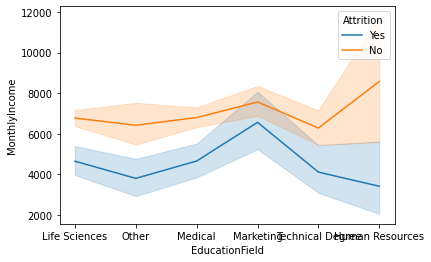

In [150]:
# count_plot2 = sns.FacetGrid(data=df, col='JobRole', hue='Attrition',col_wrap=4)
# count_plot2.map(sns.scatterplot, 'MonthlyIncome')

sns.lineplot(data=df, x='EducationField', y='MonthlyIncome', hue='Attrition')